In [1]:
import time
import numpy as np
import matplotlib as mpl
from matplotlib import colors
import matplotlib.pyplot as plt

In [2]:
def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = abs(Z) < horizon
        N[I] = n
        Z[I] = Z[I] ** 2 + C[I]
    N[N == maxiter - 1] = 0
    return Z, N

In [3]:
xmin, xmax, xn = -2.25, + 0.75, 3000 // 2
ymin, ymax, yn = -1.25, + 1.25, 2500 // 2
maxiter = 200
horizon = 2.0 ** 40
log_horizon = np.log2(np.log(horizon))
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

In [4]:
with np.errstate(invalid="ignore"):
    M = np.nan_to_num(N + 1 - np.log2(np.log(abs(Z))) + log_horizon)

In [5]:
dpi = 72
width = 10
height = 10 * yn / xn

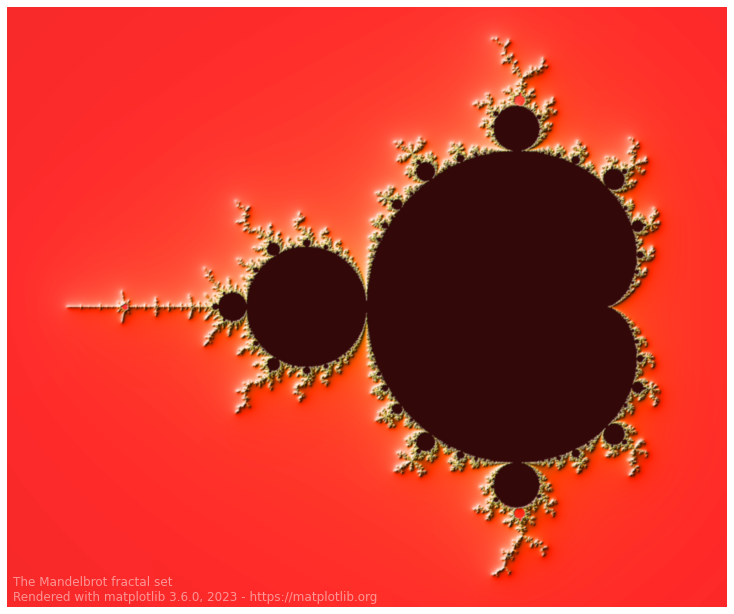

In [6]:
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=10)
M = light.shade(
    M, cmap=plt.cm.hot, vert_exag=1.5,
    norm=colors.PowerNorm(0.3), blend_mode="hsv",
)
ax.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])

# Some advertisement for matplotlib
year = time.strftime("%Y")
text = ("The Mandelbrot fractal set\n"
    "Rendered with matplotlib %s, %s - https://matplotlib.org"
    % (mpl.__version__, year)
)
ax.text(xmin + 0.025, ymin + 0.025, text, color="white", fontsize=12, alpha=0.5)

plt.show()